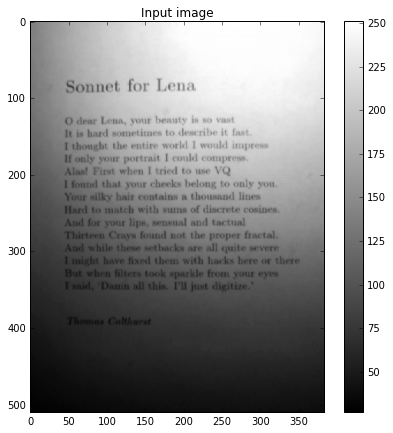

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fname = 'images/test_1.png'
img = cv2.imread(fname,0)
im = np.asarray(img, dtype=float)

plt.figure(figsize=(7,7))
plt.title('Input image')
plt.imshow(im, cmap='gray')
plt.colorbar()


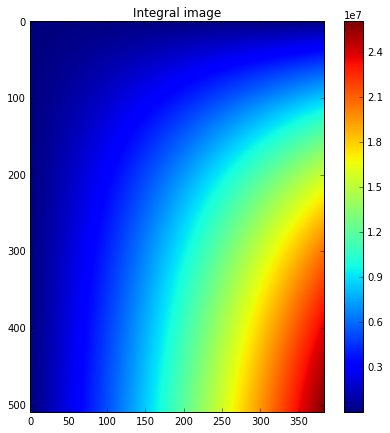

In [2]:
# build the integral image as a combination of cumulative sums along both axes
im_integral = np.cumsum(np.cumsum(im, axis=0), axis=1)

plt.figure(figsize=(7,7))
plt.title('Integral image')
plt.imshow(im_integral)
plt.colorbar()


In [3]:
# perform global thresholding first
im_thres_glob = np.zeros(im.shape)
glob_thres = 70.

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if im[i,j] < glob_thres:
            im_thres_glob[i,j] = 0  # background
        else:
            im_thres_glob[i,j] = 255  # foreground

In [4]:
# perform adaptive thresholding
im_thres_adapt = np.zeros(im.shape)

s = 30        # window size
ratio = 0.88  # percentage used for thresholding

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        
        # get coordinates of the window
        y1 = i - s/2
        y2 = i + s/2

        x1 = j - s/2
        x2 = j + s/2

        # check boundaries
        y1 = 1 if y1 < 1 else y1
        x1 = 1 if x1 < 1 else x1

        y2 = im.shape[0]-1 if y2 >= im.shape[0] else y2
        x2 = im.shape[1]-1 if x2 >= im.shape[1] else x2

        cnt = (x2 - x1)*(y2 - y1)
        val = im_integral[y2,x2] - im_integral[y1-1,x2] - im_integral[y2,x1-1] + im_integral[y1-1,x1-1]

        if im[i,j]*cnt < val*ratio:
            im_thres_adapt[i,j] = 0    # background
        else:
            im_thres_adapt[i,j] = 255  # foreground

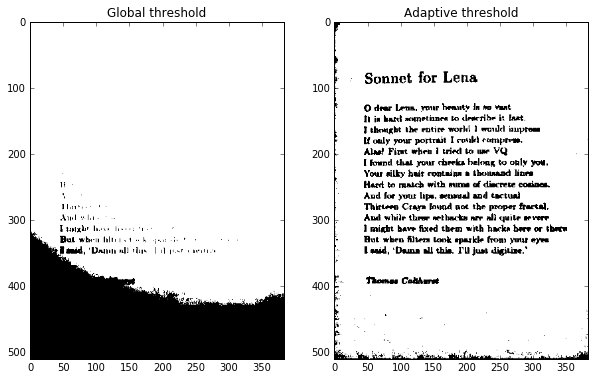

In [5]:
# plot results
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.title('Global threshold')
plt.imshow(im_thres_glob, cmap='gray')

fig.add_subplot(1,2,2)
plt.title('Adaptive threshold')
plt.imshow(im_thres_adapt, cmap='gray')